In [4]:
#3.1
import numpy as np
from math import pi as pi
from random import sample

def p_centerContain(n):
    total = 10000 #total number of experiments
    result = 0 #number of successful experiments
    nodesList = list(range(0,n)) #list of polygon nodes, from 0 to n-1
    for i in range(0,total):
        selectedNodes = sample(nodesList,3) #choosing 3 random nodes from list
        selectedNodes.sort()
        n1 = selectedNodes[0] #the smallest number from selected nodes
        n2 = selectedNodes[1] #the medium number
        n3 = selectedNodes[2] #the largest number
        theta12 = (n2-n1)*pi/n  #angle between n1,n2
        theta23 = (n3-n2)*pi/n
        theta13 = (n-(n3-n1))*pi/n
        if theta12<pi/2 and theta13<pi/2 and theta23<pi/2: #triangle includes center, if all 3 angles are less than pi/2
            result = result+1
    probability = result/total
    return probability
print(p_centerContain(6))

0.0985


In [19]:
#3.2
def centerContainCaller():
    MC_Result = np.zeros(1500-3+1) #initializing MC_Result
    MC_Avg = np.zeros(1500-3+1) #initializing MC_Avg
    for i in range(0,1500-3+1):
        MC_Result[i] = p_centerContain(i+3) #recalling previous function, assigning the result in MC_Result
        if i==0:
            MC_Avg[i] = MC_Result[i] #for the first loop
        else:
            MC_Avg[i] = (MC_Avg[i-1]*i+MC_Result[i])/(i+1) #(sum of previous values + new value)/new size
    return MC_Avg

        
        
        
        
        
        
        

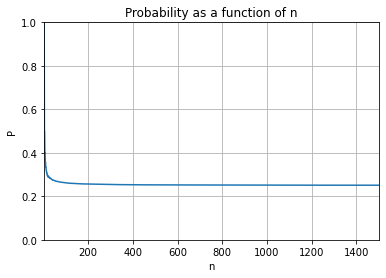

0.2510405874499331


In [20]:
#3.3
from matplotlib import pyplot
MC_avg = centerContainCaller()

pyplot.figure()
pyplot.plot(list(range(3,1500+1)),MC_avg)
pyplot.title('Probability as a function of n')
pyplot.xlabel('n')
pyplot.ylabel('P')
pyplot.grid(True)
pyplot.axis([3,1500+1,0,1])

pyplot.show()

print(MC_avg[-1])